Метод последовательной верхней релаксации при шахматном
упорядочивании с оптимальным параметром

In [9]:
import math
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
%matplotlib inline

In [10]:
#Шаг сетки
h = 0.05

#Инициализация
n = math.floor(1/h)
u1 = [[0]*(n+1) for i in range(n+1)]
u2 = [[0]*(n+1) for i in range(n+1)]

#Количество итераций
m = - math.ceil(2*n/math.pi*math.log(0.000001))
print(m)

#Параметр
t = 2*(1-math.pi/n)

175


In [11]:
#Верхняя релаксация
for k in range(m):
    for j in range(1,n):
        for i in range(1,n):
            u2[i][j] = t/4*(u2[i-1][j] + u2[i][j-1] + u1[i][j+1]+u1[i+1][j] - 4*(1-1/t)*u1[i][j] + h*h*8*(i*h*(1-i*h) + j*h*(1-j*h)))
    for i in range(n+1):
        for j in range(n+1):
            u1[i][j] = u2[i][j]

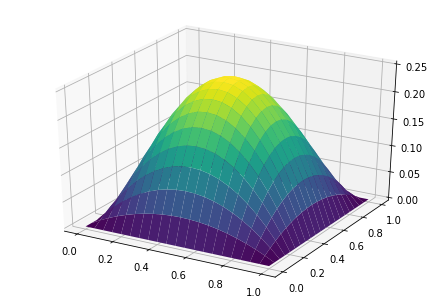

In [7]:
# Результат
def makeData ():
    x = numpy.arange (0, 1+h, h)
    y = numpy.arange (0, 1+h, h)
    xgrid, ygrid = numpy.meshgrid(x, y)
    zgrid = numpy.matrix(u2)
    return xgrid, ygrid, zgrid

x, y, z = makeData()
fig = pylab.figure('Верхняя релаксация при шахматном упорядочивании с оптимальным параметром')
axes = Axes3D(fig)
axes.plot_surface(x, y, z, cmap = cm.viridis)
pylab.show()
